# CROP DISEASE PREDICTION

## Importing libraries

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing
### Training Image preprocessing

In [29]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/plantvillage/PlantVillage/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 43444 files belonging to 38 classes.


### Validation Image Preprocessing

In [30]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/plantvillage/PlantVillage/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10861 files belonging to 38 classes.


### Testing Image Preprocessing

In [31]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 33 files belonging to 1 classes.


### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature


## Building Model

In [32]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3))
])

### Building Convolution Layer

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [39]:
cnn.add(tf.keras.layers.Flatten())

In [40]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [41]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [42]:
# #Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase


In [43]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [44]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,418,762 (123.67 MB)

 Trainable params: 32,418,762 (123.67 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 270s 193ms/step - accuracy: 0.5402 - loss: 1.7021 - val_accuracy: 0.8716 - val_loss: 0.4163
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 256s 188ms/step - accuracy: 0.8680 - loss: 0.4276 - val_accuracy: 0.9078 - val_loss: 0.2868
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 255s 188ms/step - accuracy: 0.9237 - loss: 0.2401 - val_accuracy: 0.9290 - val_loss: 0.2153
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 254s 187ms/step - accuracy: 0.9510 - loss: 0.1495 - val_accuracy: 0.9473 - val_loss: 0.1631
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 254s 187ms/step - accuracy: 0.9591 - loss: 0.1240 - val_accuracy: 0.9462 - val_loss: 0.1826
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 254s 187ms/step - accuracy: 0.9714 - loss: 0.0894 - val_accuracy: 0.9568 - val_loss: 0.1605
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 254s 187ms/step - accuracy: 0.9743 - loss: 0.0786 - val_accuracy: 0.9556 - val_loss: 0.1682
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 254s 187ms/step - ac

## Evaluating Model

In [47]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
# print('Training accuracy:', train_acc)
print(f" Training Accuracy: {train_acc * 100:.2f}%")

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 66s 48ms/step - accuracy: 0.9868 - loss: 0.0420
 Training Accuracy: 98.80%


In [48]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)
print(f" Val_Accuracy: {val_acc * 100:.2f}%")

340/340 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9491 - loss: 0.1915
Validation accuracy: 0.9474265575408936
 Val_Accuracy: 94.74%


### Saving Model

In [50]:
cnn.save('trained_plant_disease_model.h5')

In [51]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [52]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Accuracy Visualization

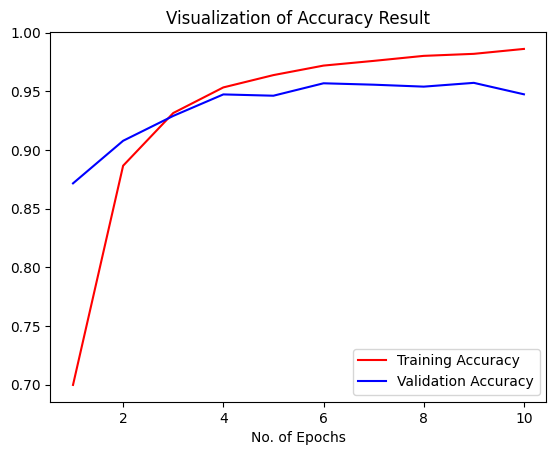

In [53]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [54]:
class_name = validation_set.class_names

In [55]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 33 files belonging to 1 classes.


In [56]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [57]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [58]:
Y_true

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [59]:
predicted_categories

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([ 2,  2,  2,  2,  0,  0, 20,  8,  8,  8, 20, 20, 20, 20, 20, 22, 22,
       29, 29, 29, 29, 29, 29, 37, 25, 37, 37, 35, 35, 35, 35, 35, 35])>

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [61]:
# Precision Recall Fscore

# Convert tensors to numpy arrays
Y_true_np = Y_true.numpy()
predicted_categories_np = predicted_categories.numpy()

# Find unique classes
unique_classes = sorted(set(Y_true_np).union(set(predicted_categories_np)))

# Print the number of unique classes and the length of class_name
print(len(unique_classes), len(class_name))

# Use the unique classes in labels
print(classification_report(Y_true_np, predicted_categories_np, labels=unique_classes, target_names=class_name[:len(unique_classes)]))


9 38
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.06      0.11        33
                                 Apple___Black_rot       0.00      0.00      0.00         0
                          Apple___Cedar_apple_rust       0.00      0.00      0.00         0
                                   Apple___healthy       0.00      0.00      0.00         0
                               Blueberry___healthy       0.00      0.00      0.00         0
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00         0
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00         0
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00         0
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00         0

                                          accuracy                       

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Test set Image Processing

In [62]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/plantvillage/PlantVillage/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 10861 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

### Loading Model

In [63]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')

### Visualising and Performing Prediction on Single image

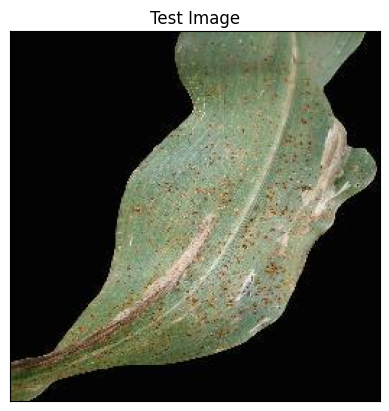

In [115]:
#Test Image Visualization

import cv2

image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)


# Displaying the image 
if img is None:
    print(f"Error: Unable to load image at {image_path}. Please check the file path.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img)
    plt.title('Test Image')
    plt.xticks([])
    plt.yticks([])
    plt.show()


### Testing Model

In [116]:
# image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
# input_arr = tf.keras.preprocessing.image.img_to_array(image)
# input_arr = np.array([input_arr])  # Convert single image to a batch.
# predictions = cnn.predict(input_arr)

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the trained model
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')

# Test Image Path
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG'
# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.

# Make predictions
predictions = cnn.predict(input_arr)
confidence_score = np.max(predictions) * 100  # Convert to percentage
result_index = np.argmax(predictions)  # Return index of max element


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


In [117]:
print(predictions)

[[1.7483642e-13 1.1035288e-18 6.5996342e-19 2.7101706e-18 7.9846103e-20
  1.0615864e-16 8.3960008e-20 9.3650059e-16 1.0000000e+00 9.2233629e-17
  1.1080260e-17 3.7997596e-23 2.7646757e-20 2.7686678e-18 1.1547813e-27
  1.1276691e-20 6.2246892e-19 1.6133639e-22 2.4938159e-16 2.6431687e-20
  5.3493683e-16 2.7362917e-22 2.1616698e-24 7.1480629e-25 8.2633293e-23
  1.4228515e-19 1.2212587e-16 7.6889381e-24 3.7872315e-21 2.9708598e-16
  8.5264835e-15 4.1192150e-19 1.4970694e-18 2.1469910e-25 1.6889213e-22
  5.2306173e-23 7.3835772e-26 7.3937288e-17]]


In [118]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


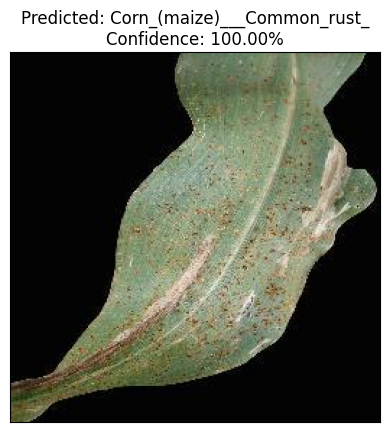

Predicted Label: Corn_(maize)___Common_rust_
Confidence Score: 100.00%


In [119]:
class_names = validation_set.class_names

# Get the predicted label
predicted_label = class_names[result_index]

# Display the image with the label, confidence, and accuracy
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Unable to load image at {image_path}. Please check the file path.")
else:
    # Convert BGR to RGB for displaying
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Prepare text with the prediction result
    label_text = f"Predicted: {predicted_label}\nConfidence: {confidence_score:.2f}%"
    
    # Display the image with the label on top
    plt.imshow(img_rgb)
    plt.title(label_text)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Print predictions and result index for debugging

print("Predicted Label:", predicted_label)
print(f"Confidence Score: {confidence_score:.2f}%")

## Treatment Recommendation

In [129]:
import tensorflow as tf
# Load the trained classification model
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')

# Load the treatment dataset from CSV file
treatment_df = pd.read_csv("/kaggle/input/treat-dise/Disease_Treatment2.csv")

In [121]:
# Function to get treatment based on the disease name
def get_treatment(disease_name):
    treatment_info = treatment_df[treatment_df['Disease'] == disease_name]
    if not treatment_info.empty:
        return treatment_info['Treatment'].values[0]
    else:
        return "No treatment information available."


In [130]:
# Load the treatment dataset from CSV file
treatment_df = pd.read_csv("/kaggle/input/treat-dise/Disease_Treatment2.csv")

# Test Image Path
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG'
# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.

In [131]:
# Make predictions
predictions = cnn.predict(input_arr)
confidence_score = np.max(predictions) * 100  # Convert to percentage
result_index = np.argmax(predictions)  # Return index of max element


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


In [132]:
# Load class names from the validation set
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/plantvillage/PlantVillage/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_names = validation_set.class_names


Found 10861 files belonging to 38 classes.


In [133]:
# Get the predicted label
predicted_label = class_names[result_index]

In [134]:
# Get the treatment for the predicted disease
treatment_recommendation = get_treatment(predicted_label)

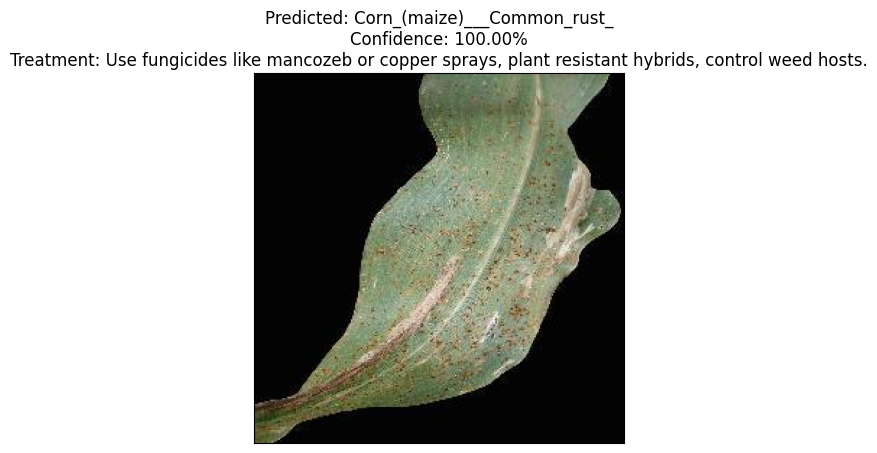

Predicted Label: Corn_(maize)___Common_rust_
Confidence Score: 100.00%
Treatment Recommendation: Use fungicides like mancozeb or copper sprays, plant resistant hybrids, control weed hosts.


In [135]:
# Display the image with the label, confidence, and treatment recommendation
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Unable to load image at {image_path}. Please check the file path.")
else:
    # Convert BGR to RGB for displaying
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Prepare text with the prediction result and treatment recommendation
    label_text = f"Predicted: {predicted_label}\nConfidence: {confidence_score:.2f}%\nTreatment: {treatment_recommendation}"
    
    # Display the image with the label on top
    plt.imshow(img_rgb)
    plt.title(label_text)
    plt.xticks([])
    plt.yticks([])
    plt.show()

print("Predicted Label:", predicted_label)
print(f"Confidence Score: {confidence_score:.2f}%")
print(f"Treatment Recommendation: {treatment_recommendation}")